# マージソート

In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random

In [8]:
def merge_sort(array):
    N = len(array)
    if N > 2:
        left = merge_sort(array[:int(N/2)])
        right = merge_sort(array[int(N/2):])
        n_left = len(left)
        n_right = len(right)
        i_left = 0
        i_right = 0
        result = []
        while i_left < n_left and i_right < n_right:
            if left[i_left] <= right[i_right]:
                result.append(left[i_left])
                i_left += 1
            else:
                result.append(right[i_right])
                i_right += 1
        if i_left < n_left:
            result.extend(left[i_left:])
        if i_right < n_right:
            result.extend(right[i_right:])
        return np.array(result)
    elif N == 2:
        if array[0] <= array[1]:
            return array
        else:
            return array[::-1]
    else:
        return array

In [26]:
arr = np.array([random.randint(0, 100) for i in range(30)])
merge_sort(arr)

array([ 1,  4,  7,  8,  9, 12, 19, 21, 22, 23, 45, 45, 47, 51, 52, 55, 58,
       60, 63, 67, 72, 78, 79, 82, 84, 85, 87, 88, 90, 96])

In [35]:
n_list = []
t_list = []
sorted_before = []
sorted_after = []
for n in [int(math.pow(2, i)) for i in range(7, 19+1)]:
    arr = np.array([random.random() for i in range(n)])
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_before.append(b)
    
    start = time.time()
    arr = merge_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_after.append(b)

pd.DataFrame(data=np.array([n_list, t_list, sorted_before, sorted_after]).T, columns=['array length', 'sort time [s]', 'sorted (before)', 'sorted (after)'])

,array length,sort time [s],sorted (before),sorted (after)
0,128.0,0.001564,0.0,1.0
1,256.0,0.003693,0.0,1.0
2,512.0,0.007493,0.0,1.0
3,1024.0,0.016567,0.0,1.0
4,2048.0,0.038283,0.0,1.0
5,4096.0,0.079729,0.0,1.0
6,8192.0,0.175226,0.0,1.0
7,16384.0,0.368275,0.0,1.0
8,32768.0,0.678400,0.0,1.0
9,65536.0,1.595578,0.0,1.0


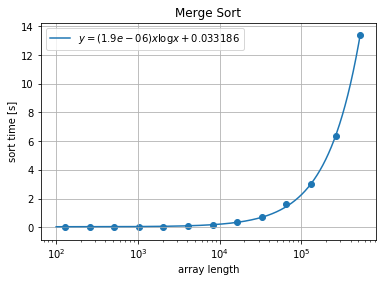

,a
0,0.000002
1,0.033186


In [37]:
from scipy.optimize import curve_fit
def func_fit(x, a, b):
    return a * x * np.log(x) + b

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(1, int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1])

plt.title('Merge Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x \log{{x}} + {}$'.format(round(param[0], 7), round(param[1], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])